ChatGPT was used to help in solving some of these.
link:

In [278]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Functions

In [279]:
def train_test(df,df2):
  X = df
  y = df2
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .8)
  return X_train, X_test, y_train, y_test

In [280]:
def Regression(X_train, y_train):
  model = LogisticRegression(max_iter=10000)
  # fit the model
  model = LogisticRegression()
  model.fit(X_train, y_train)
  feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_[0]})
  feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
  return feature_importance

In [281]:
def heatmap(df):
  ##Using a heatmap to better visualize the data
  correlation_matrix = df.corr()
  plt.figure(figsize=(10, 8))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
  plt.title('Correlation Heatmap')
  return plt.show()

In [282]:
url = 'https://raw.githubusercontent.com/deanymar/DataSets/main/churn.csv'
churn_df = pd.read_csv(url)

In [283]:
churn_df.head(5) ##see how the data look

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [284]:
churn_df.dtypes ##we can see that Total Charges is an object when it should be a float

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [285]:
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'],errors='coerce')
churn_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [286]:
churn_df.isna().sum() ##we can see that under Total Charges there are 11 nulls we can drop them because there are over 7000 rows

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [287]:
churn_df.dropna(inplace=True)
churn_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [288]:
churn_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [289]:
churn_df.describe() ##basic information

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [290]:
##now we can see we have many values that are yes/no or options.
churn_df = churn_df.drop("customerID",axis = 1) ##dropping customerID serves no purpose
churn_df_dummy = pd.get_dummies(data=churn_df)

In [291]:
# Create a list of columns containing 'no'
columns_with_no = [col for col in churn_df_dummy if 'no' in col.lower()]
churn_df_dummy.drop(columns_with_no,axis= 1,inplace=True)

# What causes people to Churn(To cancel their plan)

In [292]:
X = churn_df_dummy.drop(["Churn_Yes"],axis = 1)
y = churn_df_dummy["Churn_Yes"]
X_train, X_test, y_train, y_test=train_test(X,y)

In [293]:
feature_importance = Regression(X_train, y_train)
feature_importance

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Feature,Coefficient
18,Contract_Month-to-month,0.458682
11,InternetService_Fiber optic,0.422735
21,PaperlessBilling_Yes,0.392087
0,SeniorCitizen,0.313326
9,MultipleLines_Yes,0.193409
24,PaymentMethod_Electronic check,0.134004
17,StreamingMovies_Yes,0.126990
10,InternetService_DSL,0.078620
6,Partner_Yes,0.077988
16,StreamingTV_Yes,0.023028


In [294]:
top_five_features  = feature_importance['Feature'].head()
top_five_features

18        Contract_Month-to-month
11    InternetService_Fiber optic
21           PaperlessBilling_Yes
0                   SeniorCitizen
9               MultipleLines_Yes
Name: Feature, dtype: object

In [295]:
churn_cause_df = churn_df_dummy[top_five_features.tolist() + ['Churn_Yes']] ##We use to list to make sure they are in the correct order

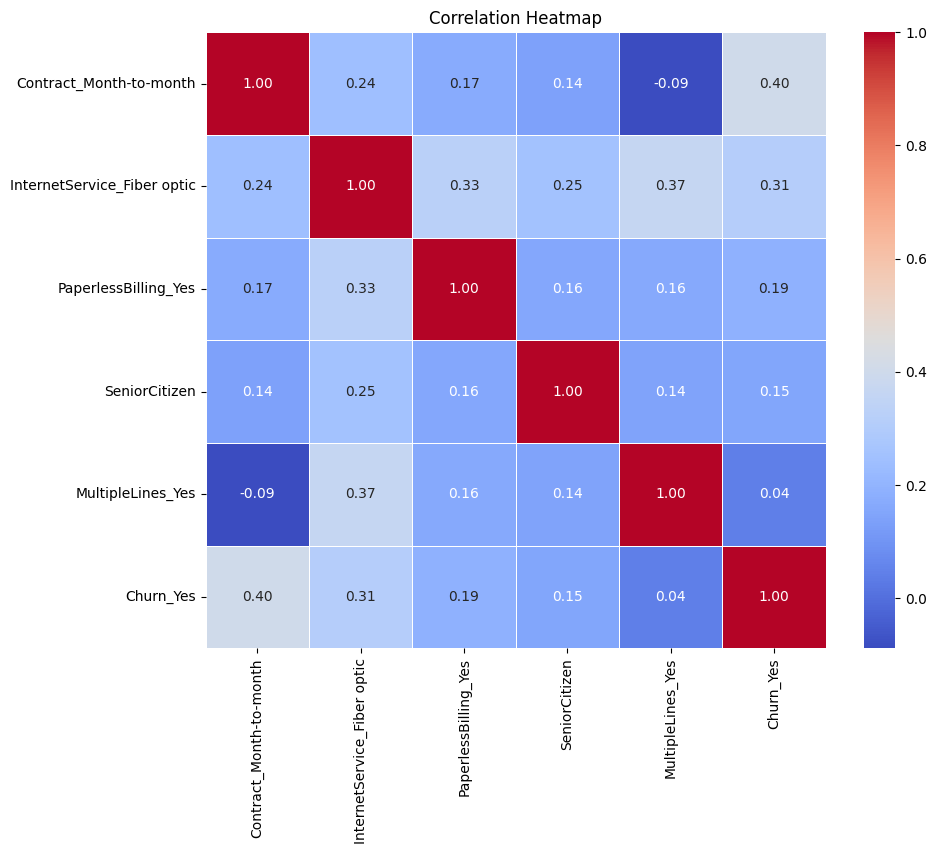

In [296]:
heatmap(churn_cause_df)

We can conclude based on the above findings that people will most likely leave if they are under a month to month contract. This woud make sense as there is no cancellation fees, and its easier to just switch.
We can also conclude that people who have a phone service plan probably churn less because it could be that its under contract. Also people who have tech-support churn less due to the fact of getting an actual service

# What type of plan are senior citizens most likely to purchase

In [311]:
X = churn_df_dummy[['PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes']]
y = churn_df_dummy['SeniorCitizen']
X_train, X_test, y_train, y_test = train_test(X,y)

In [312]:
features = Regression(X_train, y_train)
features

,Feature,Coefficient
3,InternetService_Fiber optic,2.242731
2,InternetService_DSL,1.203368
1,MultipleLines_Yes,0.448807
9,StreamingMovies_Yes,0.138346
5,OnlineBackup_Yes,0.078517
8,StreamingTV_Yes,0.023428
6,DeviceProtection_Yes,-0.049558
4,OnlineSecurity_Yes,-0.362207
7,TechSupport_Yes,-0.567586
0,PhoneService_Yes,-0.758184


In [313]:
churn_senior_df = churn_df_dummy[features['Feature'].tolist() + ['SeniorCitizen']]

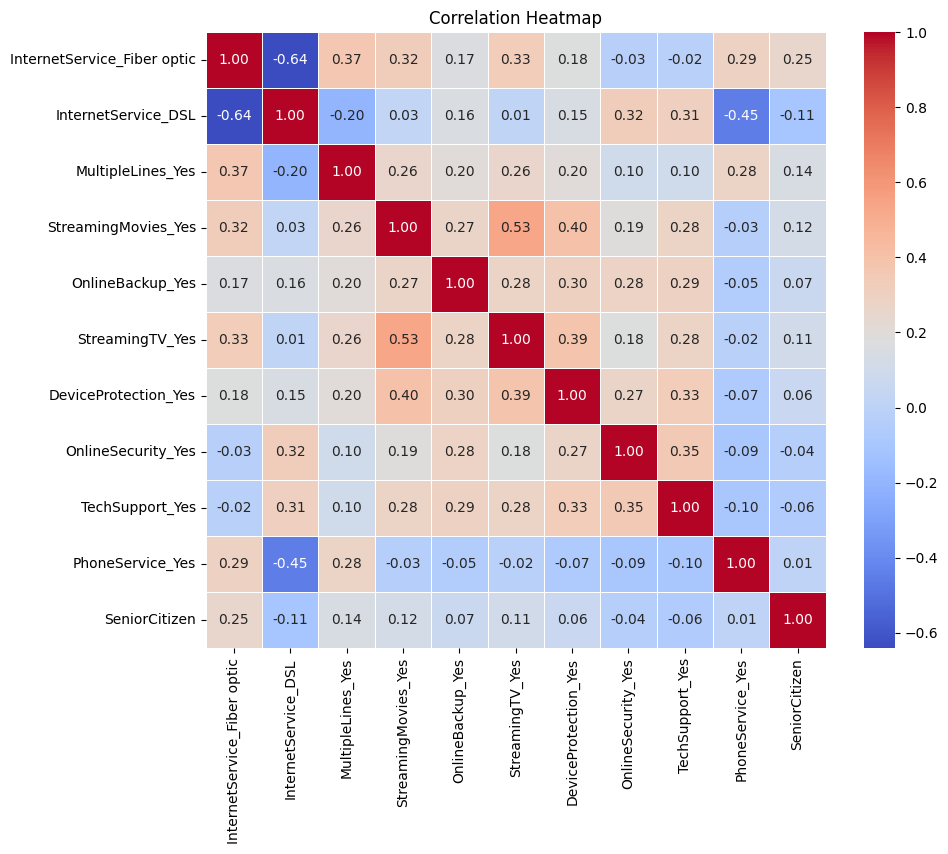

In [314]:
heatmap(churn_senior_df)